# Autograd and Pandas

## Imports

In [1]:
#!pip install -U matplotlib
import numpy as np
import torch
import matplotlib.pyplot as plt

## Computation graphs and Autograd


$ y = 3x^2 + 4x + 2$

`x` = `5`  
$ y = 3*5^2 + 4*5 + 2 $\
$ y = 3*25 + 20 + 2$\
$ y = 75 + 20 + 2 $\
$ y = 97 $

In [2]:
#set requires_grad=true if you need the grad later
x = torch.tensor(5., requires_grad=True)

In [3]:
y = 3*x**2 + 4*x + 2
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
torch      module    <module 'torch' from '/us<...>kages/torch/__init__.py'>
x          Tensor    tensor(5., requires_grad=True)
y          Tensor    tensor(97., grad_fn=<AddBackward0>)


The `backward()` method is used to compute the gradient during the backward pass in a neural network.

The derivative of `y` with respect to the variable `x`.\
$\frac{dy}{dx} = 2*3x + 4 = 6x + 4$\
`x` = `5`

$6x + 4 = 6*5 + 4 = 30 + 4 = 34$


In [4]:
y.backward()
x.grad

tensor(34.)

PyTorch accumulates the derivatives (gradients) on each subsequent backward passes. This is convinient during training **R**ecurrent **N**eural **N**etworks \\
To set it zero in each iteration you can use `grad.zero_` function on a `Tensor`.


In [5]:
x = torch.tensor(5., requires_grad=True)

for i in range(3):
    y = 3*x**2 + 4*x + 2
    y.backward()
    print(x.grad)
  #x.grad.zero_() ## pytorch accumulates the derivatives by default


tensor(34.)
tensor(68.)
tensor(102.)


to convert a `torch.tensor` to `numpy.ndarray` you have to explicitly remove the computational graph from the tensor using `detach()` command

In [6]:
x = torch.tensor(5., requires_grad=False) # torch.tensor can not converted to numpy if grad is True
np_x = x.numpy()
np_x = x.detach().numpy()
print(f'np_x type: {type(np_x)}')
print(f'np_x: {np_x}')

np_x type: <class 'numpy.ndarray'>
np_x: 5.0


A bit more complex calculation of gradients

$e = \underbrace{(a * b)}_\text{u} + \underbrace{c * \underbrace{log(d)}_\text{w}}_\text{v}$

digraph G {
	e
	u
	v
	w
	a [color=transparent]
	b [color=transparent]
	c [color=transparent]
	d [color=transparent]
	e -> u [dir=back]
	e -> v [dir=back]
	v -> w [dir=back]
	v -> c [dir=back]
	u -> a [dir=back]
	u -> b [dir=back]
	w -> d [dir=back]
}



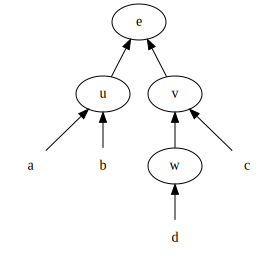

In [7]:
# conda install python-graphviz
import graphviz #graphviz, python-graphviz, (pydot)
g = graphviz.Digraph('G', filename='hello.gv')
g.node('e')
g.node('u')
g.node('v')
g.node('w')
g.node('a', color='transparent')
g.node('b', color='transparent')
g.node('c', color='transparent')
g.node('d', color='transparent')
g.edge('e', 'u', dir='back')
g.edge('e', 'v', dir='back')
g.edge('v', 'w', dir='back')
g.edge('v', 'c', dir='back')
g.edge('u', 'a', dir='back')
g.edge('u', 'b', dir='back')
g.edge('w', 'd', dir='back')
print(g.source)
g

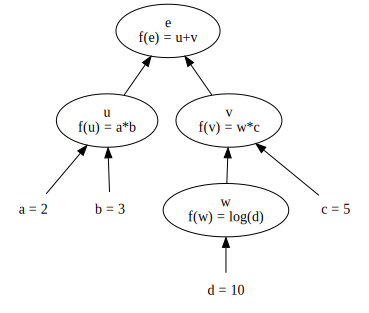

In [8]:
g = graphviz.Digraph('G', filename='hello.gv')
g.node('e\nf(e) = u+v')
g.node('u\nf(u) = a*b')
g.node('v\nf(v) = w*c')
g.node('w\nf(w) = log(d)')
g.node('a = 2', color='transparent')
g.node('b = 3', color='transparent')
g.node('c = 5', color='transparent')
g.node('d = 10', color='transparent')
g.edge('e\nf(e) = u+v', 'u\nf(u) = a*b', dir='back')
g.edge('e\nf(e) = u+v', 'v\nf(v) = w*c', dir='back')
g.edge('v\nf(v) = w*c', 'w\nf(w) = log(d)', dir='back')
g.edge('v\nf(v) = w*c', 'c = 5', dir='back')
g.edge('u\nf(u) = a*b', 'a = 2', dir='back')
g.edge('u\nf(u) = a*b', 'b = 3', dir='back')
g.edge('w\nf(w) = log(d)', 'd = 10', dir='back')
g

In case of forward-pass (of backpropagation) we have to replace the variables in the equation:

$e = \underbrace{(a * b)}_\text{u} + \underbrace{c * \underbrace{log(d)}_\text{w}}_\text{v} = (2 * 3) + (5 * \underbrace{log(10)}_\text{1}) = 11$

To calculate the backward-pass simply let `torch` do the math and calculate the derivative of **`e`** with respect to the inputs leading to **`e`**

$\frac{\partial e}{\partial a} = ?$ \\
$\frac{\partial e}{\partial b} = ?$ \\
$\frac{\partial e}{\partial c} = ?$ \\
$\frac{\partial e}{\partial d} = ?$

In [9]:
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
c = torch.tensor(5., requires_grad=True)
d = torch.tensor(10., requires_grad=True)

# e = (a * b) + c * torch.log10(d)
u = a*b
w = torch.log10(d)
v = c * w
e = u + v
e

u.retain_grad()
w.retain_grad()
v.retain_grad()

e.retain_grad()

In [10]:
e.backward()
print(f"a:\n\t is_leaf: {a.is_leaf} \n\t grad_fn: {a.grad_fn} \n\t grad: {a.grad}")
print(f"b:\n\t is_leaf: {b.is_leaf} \n\t grad_fn: {b.grad_fn} \n\t grad: {b.grad}")
print(f"c:\n\t is_leaf: {c.is_leaf} \n\t grad_fn: {c.grad_fn} \n\t grad: {c.grad}")
print(f"d:\n\t is_leaf: {d.is_leaf} \n\t grad_fn: {d.grad_fn} \n\t grad: {d.grad}")
print()
print(f"u:\n\t is_leaf: {u.is_leaf} \n\t grad_fn: {u.grad_fn} \n\t grad: {u.grad}")
print(f"w:\n\t is_leaf: {w.is_leaf} \n\t grad_fn: {w.grad_fn} \n\t grad: {w.grad}")
print(f"v:\n\t is_leaf: {v.is_leaf} \n\t grad_fn: {v.grad_fn} \n\t grad: {v.grad}")
print()
print(f"e:\n\t is_leaf: {e.is_leaf} \n\t grad_fn: {e.grad_fn} \n\t grad: {e.grad}")

a:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 3.0
b:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 2.0
c:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 1.0
d:
	 is_leaf: True 
	 grad_fn: None 
	 grad: 0.21714723110198975

u:
	 is_leaf: False 
	 grad_fn: <MulBackward0 object at 0x78b573b1baf0> 
	 grad: 1.0
w:
	 is_leaf: False 
	 grad_fn: <Log10Backward0 object at 0x78b573b191e0> 
	 grad: 5.0
v:
	 is_leaf: False 
	 grad_fn: <MulBackward0 object at 0x78b573b1baf0> 
	 grad: 1.0

e:
	 is_leaf: False 
	 grad_fn: <AddBackward0 object at 0x78b573b1baf0> 
	 grad: 1.0


The partial derivatives of `u`, `w` and `v` variables:

In [11]:
from IPython.display import display, Math
display(Math(fr'\frac{{\partial e}}{{\partial a}} = {a.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial b}} = {b.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial c}} = {c.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial d}} = {d.grad.item()}'))
print()
print()
display(Math(fr'\frac{{\partial e}}{{\partial u}} = {u.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial w}} = {w.grad.item()}'))
print()
display(Math(fr'\frac{{\partial e}}{{\partial v}} = {v.grad.item()}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Loading datasets via **Pandas**

download `Car_sales.csv` from the official Kaggle source: https://www.kaggle.com/abhi827/car-sales/data?select=Car_sales.csv

In [12]:
#import wget # download files
#!wget https://www.kaggle.com/abhi827/car-sales/data?select=Car_sales.csv --no-check-certificate
! gdown 1VLd6a2yg8pp9ZEaRtE5QVJe_0KFx80Mu
! gdown 1WZASwB4Kk9QcJI0BP1CObqTXmQWDg4u0

Downloading...
From: https://drive.google.com/uc?id=1VLd6a2yg8pp9ZEaRtE5QVJe_0KFx80Mu
To: /content/Car_sales_headless.csv
100% 15.8k/15.8k [00:00<00:00, 49.4MB/s]


Read the data with default parameter:
**pd.read_csv("Car_sales.csv")** - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Most common parameters:
- header and name
    - Example:
    Import dataset when the header row does not exist \\
    **`header` = `None`** \\
    **`names` = `list_of_strings`**
- separator character
    - Example:
    Import dataset when the separator is `','`  \\
    **`sep` = `','`**
- missing values
    - Example:
    Import dataset when missing values are noted as empty space\\
    **`na_values` = `''`**
    


In [13]:
#conda install pandas
import pandas as pd

header_values = ['Manufacturer','Model','Sales_in_thousands','4__year_resale_value','Vehicle_type','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Latest_Launch','Power_perf_factor']
df= pd.read_csv("Car_sales_headless.csv", header=None, names=header_values, sep=',', na_values='')
df.head()

,Manufacturer,Model,Sales_in_thousands,4__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


## Visualisation and description

Data overview:
- **df.head()** - first 5 data
- **df.tail()** - last 5 data
- **df.describe()** - simple statistic
- **df.info()** - df.shape, df.dtypes, df.isna(), memory
    - df.shape - data size and heads
    - df.dtypes - type of each coulomb
    - df.isna().sum().sum() - number of NaN parameters
- **df['Engine_size']** - specify a subset
- **df['Engine_size'].value_counts** - count based on type

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          157 non-null    object 
 1   Model                 157 non-null    object 
 2   Sales_in_thousands    157 non-null    float64
 3   4__year_resale_value  121 non-null    float64
 4   Vehicle_type          157 non-null    object 
 5   Price_in_thousands    155 non-null    float64
 6   Engine_size           156 non-null    float64
 7   Horsepower            156 non-null    float64
 8   Wheelbase             156 non-null    float64
 9   Width                 156 non-null    float64
 10  Length                156 non-null    float64
 11  Curb_weight           155 non-null    float64
 12  Fuel_capacity         156 non-null    float64
 13  Fuel_efficiency       154 non-null    float64
 14  Latest_Launch         157 non-null    object 
 15  Power_perf_factor     1

,Sales_in_thousands,4__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


#### Dealing with missing values:
- padding with zeros
- averaging
- most common value
- random distribution sampling
- removing (generally applicable, losing data)
- special rules

On your dataset run `dropna` function to remove all NaN by deleting the entire row (more details: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
To specify which column(s) is consider in `dropna` function use `subset` parameter

In [15]:
df = df.dropna(subset=['Price_in_thousands'])
df.head()
df.describe()

,Sales_in_thousands,4__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,155.000000,119.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,153.000000,155.000000
mean,53.245832,18.059370,27.390755,3.060000,185.696774,107.490968,71.153548,187.313548,3.377429,17.956774,23.830065,77.043591
std,68.397550,11.549233,14.351653,1.047979,56.796444,7.665925,3.462776,13.470034,0.632515,3.900050,4.293187,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.074500,11.250000,18.017500,2.300000,149.000000,103.000000,68.400000,177.550000,2.969000,15.800000,21.000000,60.407707
50%,29.450000,14.010000,22.799000,3.000000,175.000000,107.000000,70.500000,187.800000,3.341000,17.200000,24.000000,72.030917
75%,68.183500,19.882500,31.947500,3.650000,215.000000,112.200000,73.450000,196.150000,3.810250,19.650000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [16]:
#pip install scikit-learn
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

We can easily create new columns in the existing dataset, similarly as in `dictionary` data type

In [17]:
df['Engine_ccm'] = df['Engine_size'] * 1000
df = df.dropna(subset=['Horsepower', 'Engine_ccm'])

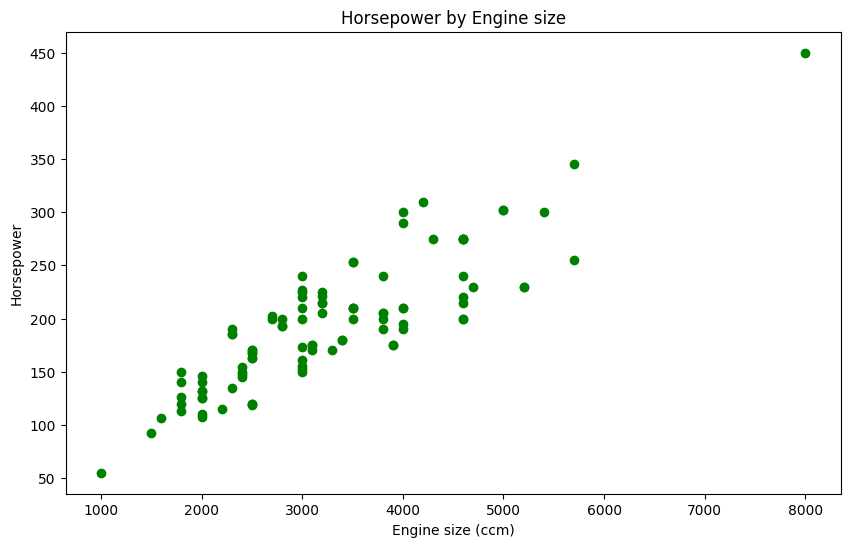

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel('Engine size (ccm)')
plt.ylabel('Horsepower')
plt.title('Horsepower by Engine size')
plt.scatter(df['Engine_ccm'].values[0:100], df['Horsepower'].values[0:100], marker='o', color='g')
plt.show()

# Solving Linear Regression with **Normal Equation**
$\Large \theta = (X^TX)^{-1} (X^Ty)$

In [19]:
x = df[['Engine_ccm']]
y = df[['Horsepower']]

xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)

xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)
def normal_equations(x,y):
    a = np.linalg.inv(np.dot(x.T, x))
    b = np.dot(x.T, y)
    theta = np.dot(a,b)
    return theta

theta = normal_equations(xg, yg)
print('Theta found by Normal Equation: slope = {} and intercept {}'.format(theta[1], theta[0]))

Theta found by Normal Equation: slope = [0.04542204] and intercept [46.70534028]


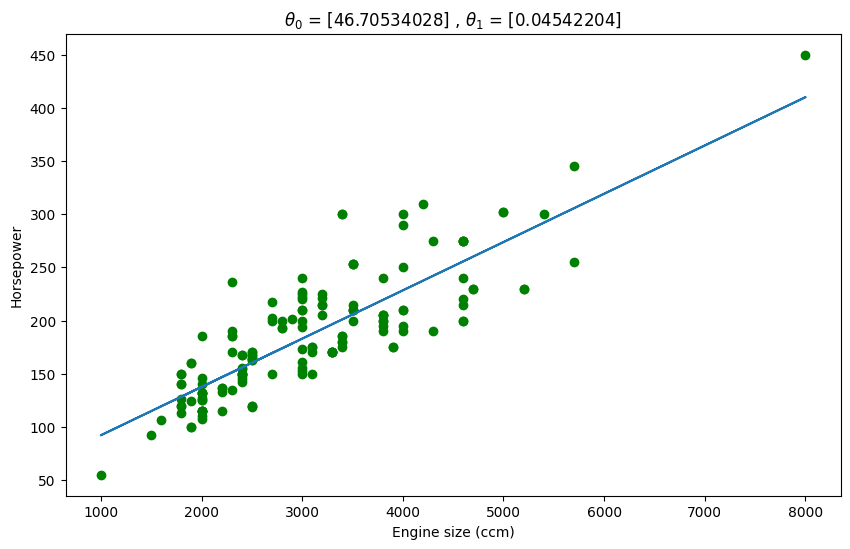

In [20]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.plot(x.to_numpy(),np.dot(xg, theta))
plt.scatter(x,y, marker='o', color='g')
plt.xlabel('Engine size (ccm)')
plt.ylabel('Horsepower')
plt.show()

# Solving Linear Regression with **Gradient Descent**
Objective of Linear Regression is to minimize the cost function:
<br>
$\Large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$\Large h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\Large \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$

In [21]:
#Define cost function J
def computeCost(x, y, theta):
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))
    return j

#Define Gradient Descent
def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)
    for i in range(iteration):
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        cost = computeCost(x, y, theta)
        j_hist.append(cost)
        #print(f'Cost at iteration {i}: {cost}')
        #theta[0] = theta[0] - ((alpha/m) *(np.sum((h_x-y))))
    return theta, j_hist

In [22]:
x = df[['Engine_ccm']]
y = df[['Horsepower']]

xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)

xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

In [23]:
theta = np.random.rand(2,1)
iteration = 10000
alpha = 1e-10

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
Theta found by Gradient Descent: slope = [0.05907318] and intercept [0.106603]


Text(0, 0.5, 'Cost')

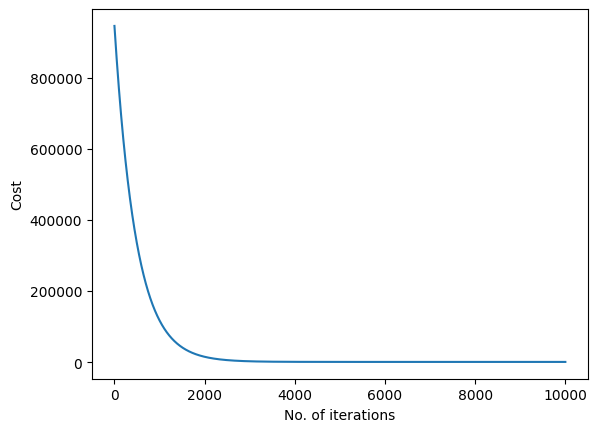

In [24]:
#theta_0 = [46.83359551] , theta_1 = [0.04544913] What are the differences?
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

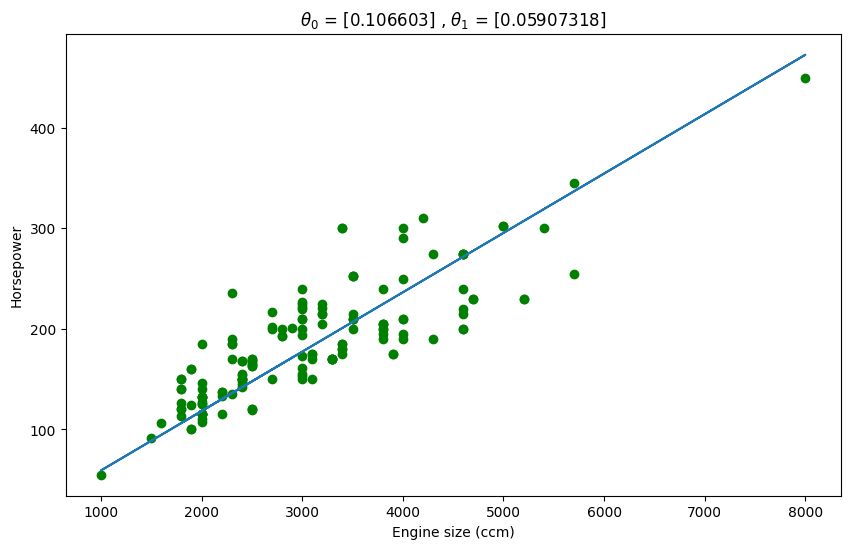

In [25]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x.values,np.dot(xg, theta))
plt.xlabel('Engine size (ccm)')
plt.ylabel('Horsepower')
plt.show()

In __Multiple Linear Regression__ we now use more than one dependent variable (feature). The basic idea remains the same.
Find the set of parameters that minimize the error / fits the best line. \\
#### Here we look at only the numerical solution: Gradient Descent. This is because as the number of features increases, the analytical solution becomes more ineficient.

In [26]:
df=pd.read_csv("Car_sales.csv")
df['Engine_ccm'] = df['Engine_size'] * 1000
#'Horsepower', 'Engine_ccm', 'Fuel_efficiency', 'Price_in_thousands', 'Fuel_capacity'
df = df.dropna(subset=['Horsepower', 'Engine_ccm', 'Fuel_efficiency'])
X = df[['Engine_ccm','Fuel_efficiency']]
Y = df[['Horsepower']]
x = X.values
y = Y.values

In [27]:
#Normalize features
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)

    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

x_norm, mu, sigma = featureNormalize(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [28]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        #print(f'Cost at iteration {i}: {cost}')
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

In [29]:
# theta_init = np.zeros((3, 1))
alpha = 0.001
num_iters = 10000
theta_init = np.random.rand(3, 1) #2 features + 1
cost, theta_final = gradientDescentMulti(x_norm, y, theta_init, alpha, num_iters)
print("")
print("Final theta:")
print(theta_final)

Running Gradient Descent

Final theta:
[[185.64748413]
 [ 46.39762876]
 [ -1.08870822]]


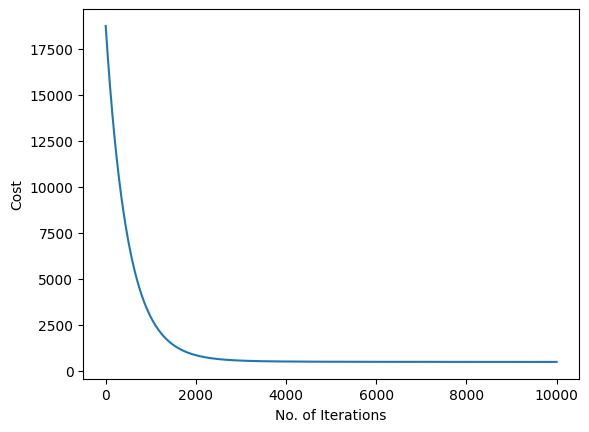

In [30]:
%matplotlib inline
plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

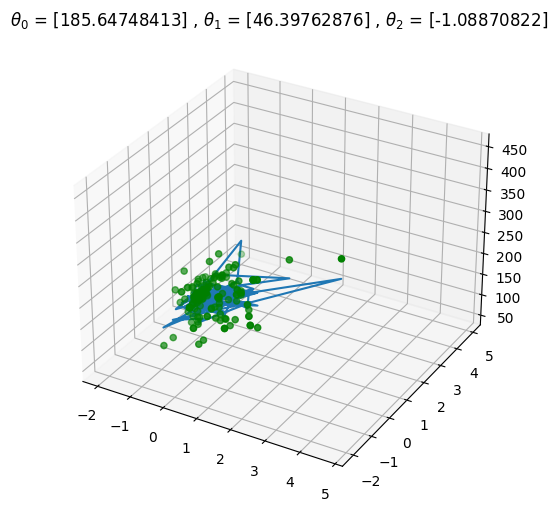

In [31]:
#%matplotlib qt
# %matplotlib inline

fig=plt.figure(figsize=(10,6))
fig3 = fig.add_subplot(projection='3d')
fig3.set_title('$\\theta_0$ = {} , $\\theta_1$ = {} , $\\theta_2$ = {}'.format(theta_final[0], theta_final[1], theta_final[2]))
fig3.scatter(x_norm[:,1],x_norm[:,2],y, marker='o', color='g')
yrep=np.array(theta_final[0]+x_norm[:,1]*theta_final[1]+x_norm[:,2]*theta_final[2])
fig3.plot(x_norm[:,1],x_norm[:,2],yrep)
plt.show()

In [32]:
x_norm[[y.argmin(),y.argmax()],1]

array([-1.96782734,  4.71770014])

In [33]:
xg2=xg
yg2=yg
for i1 in range(50):
    theta = normal_equations(xg2, yg2)
    max_idx=np.argmax(np.abs(np.dot(xg2,theta)-yg2),keepdims=np.ceil(xg2.size*0.05).astype(int))
    xg2=np.delete(xg2, max_idx, 0)
    yg2=np.delete(yg2, max_idx, None)
theta

array([6.17522063e+01, 3.46139933e-02])

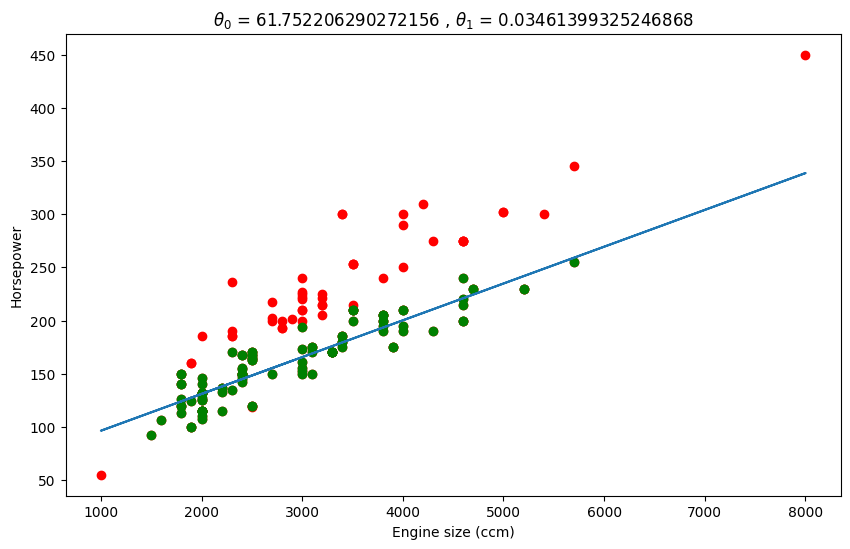

In [34]:
#%matplotlib inline
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(xg[:,1],yg, marker='o', color='r')
plt.scatter(xg2[:,1],yg2, marker='o', color='g')
plt.plot(xg[:,1],np.dot(xg, theta))
plt.xlabel('Engine size (ccm)')
plt.ylabel('Horsepower')
plt.show()

# Importing additional libraries for neural network computing

In [35]:
from torch import nn, Tensor
import torch.optim as optim
import torch.utils.data as data
import copy

### Preparing data

In [36]:
train_size = int(len(x) * 0.6)
valid_size = int(len(x) * 0.2)
test_size = len(x) - train_size - valid_size
x1=np.double(np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1))
x_train, x_valid, x_test = torch.tensor(x1[:train_size]), torch.tensor(x1[train_size:train_size+valid_size]),torch.tensor(x1[train_size+valid_size:])
y_train, y_valid, y_test = torch.tensor(y[:train_size]), torch.tensor(y[train_size:train_size+valid_size]),torch.tensor(y[train_size+valid_size:])

### Create a Neural network with pytorch

In [37]:
class CarANN(nn.Module):
    def __init__(self, num_input=3, num_output=1):
        super().__init__()
        self.linear1 = nn.Linear(num_input, 20)
        #self.act = nn.ReLU()
        self.act = nn.Sigmoid()
        self.linear2 = nn.Linear(20, num_output)
    def forward(self, x):
        x = self.linear1(x)
        x=self.act(x)
        x = self.linear2(x)
        return x

### Set up the model

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CarANN(num_input=3, num_output=1).double().to(device)

### Optimizers and their options
https://pytorch.org/docs/stable/optim.html


In [39]:
#optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9, dampening=0, weight_decay=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.01, betas=(0.99, 0.999), eps=1e-08, weight_decay=0.001)

### Loss functions and their options
https://pytorch.org/docs/stable/nn.html#loss-functions

In [40]:
loss_fn = nn.MSELoss()
#loss_fn = nn.L1Loss() #mean abs
#loss_fn = nn.SmoothL1Loss(reduction='mean', beta=1.0)

### Dataloder and its options

In [41]:
batch_size=10
loader = data.DataLoader(data.TensorDataset(x_train, y_train), shuffle=True, batch_size=batch_size)

## Training

In [42]:
n_epochs = 1000
hist_train=[];
hist_valid=[];
best_loss=float('inf')
best_model_wts = copy.deepcopy(model.state_dict())
early_stop_tolerant_count=0
early_stop_tolerant=10;
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:

        y_pred = model(X_batch.to(device))
        train_loss = loss_fn(y_pred, y_batch.to(device))
        train_loss=train_loss/batch_size
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    with torch.no_grad():
        valid_loss=0
        for i in range(0,valid_size-1):
            y_pred = model(x_valid[i].to(device))
            valid_loss = valid_loss+torch.sqrt(loss_fn(y_pred, y_valid[i].to(device)))
        valid_loss=valid_loss/valid_size
        hist_train.append(np.array(train_loss))
        hist_valid.append(np.array(valid_loss))

    early_stop_tolerant_count=early_stop_tolerant_count+1
    if valid_loss < best_loss:
        early_stop_tolerant_count=0
        best_loss = valid_loss
        best_model_wts = copy.deepcopy(model.state_dict())
    if early_stop_tolerant_count>=early_stop_tolerant:
        break
    if epoch % 50 != 0:
        continue
    print("Epoch %.4d: train loss %.2f, valid loss %.2f" % (epoch, train_loss, valid_loss))


#test
model.load_state_dict(best_model_wts)
test_loss=0
for i in range(0,test_size-1):
    y_pred = model(x_test[i].to(device))
    test_loss = test_loss+torch.sqrt(loss_fn(y_pred, y_test[i].to(device)))
test_loss=test_loss/test_size

print("Final epoch %d: train loss %.2f, valid loss %.2f, test loss %.2f" % (epoch, train_loss, valid_loss, test_loss))

Epoch 0000: train loss 5361.10, valid loss 184.47
Epoch 0050: train loss 1705.18, valid loss 116.69
Epoch 0100: train loss 221.00, valid loss 62.85
Epoch 0150: train loss 214.80, valid loss 37.93
Epoch 0200: train loss 70.34, valid loss 33.87
Final epoch 213: train loss 465.90, valid loss 34.00, test loss 47.16


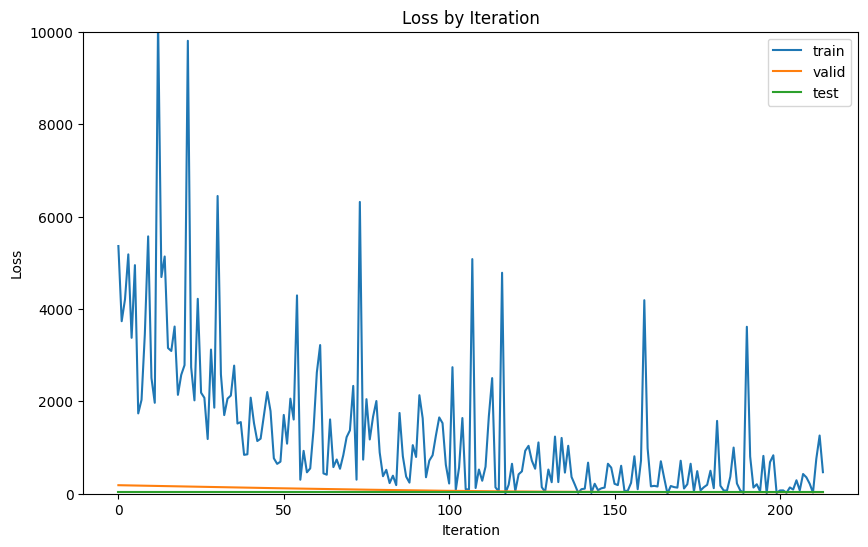

In [43]:
#%matplotlib inline
plt.figure(figsize=(10,6))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss by Iteration')
plt.plot(hist_train)
plt.plot(hist_valid)
plt.plot(test_loss.detach().numpy()*np.ones(len(hist_valid)))
plt.ylim((0,10000))
plt.legend(['train', 'valid', 'test'])